This pipeline load the data in duckdb -- This work

In [3]:
import dlt
from rest_api import rest_api_source

source = rest_api_source({
        "client": {
            "base_url": "https://api.spacexdata.com/v4"
        },

        "resources": [
            {
                "name": "launches",
                "write_disposition": "merge",
                "primary_key": "id",
                "endpoint": {
                    "path": "launches",
                },
            },
            {
                "name": "rockets",
                "endpoint": {
                    "path": "rockets",
                },
            },
            {
                "name": "crew",
                "endpoint": {
                    "path": "crew",
                },
            },
            {
                "name": "payloads",
                "endpoint": {
                    "path": "payloads",
                },
            }
        ]
    })

pipeline = dlt.pipeline(
    pipeline_name="rest_api_example0",
    destination="duckdb",
    dataset_name="rest_api_data",
)

load_info = pipeline.run(source)
print(load_info)

2024-09-07 12:08:27,098|[WARNING]|35465|8497359168|dlt|client.py|detect_paginator:292|Fallback paginator used: SinglePagePaginator at 127c818a0. Please provide right paginator manually.
2024-09-07 12:08:27,259|[WARNING]|35465|8497359168|dlt|client.py|detect_paginator:292|Fallback paginator used: SinglePagePaginator at 12534bc70. Please provide right paginator manually.
2024-09-07 12:08:27,425|[WARNING]|35465|8497359168|dlt|client.py|detect_paginator:292|Fallback paginator used: SinglePagePaginator at 127c81870. Please provide right paginator manually.
2024-09-07 12:08:27,702|[WARNING]|35465|8497359168|dlt|client.py|detect_paginator:292|Fallback paginator used: SinglePagePaginator at 127feaf50. Please provide right paginator manually.


Pipeline rest_api_example0 load step completed in 2.19 seconds
1 load package(s) were loaded to destination duckdb and into dataset rest_api_data
The duckdb destination used duckdb:////Users/alejandrogonzalezbueno/Projects/dlt_workshop/rest_api_example0.duckdb location to store data
Load package 1725703706.6292338 is LOADED and contains no failed jobs


In [48]:
import os

# Set the buffer size to 1
os.environ['DATA_WRITER__BUFFER_MAX_ITEMS'] = '1'
os.environ['EXTRACT__WORKERS'] = '1'
os.environ['NORMALIZE__WORKERS'] = '1'
os.environ['LOAD__WORKERS'] = '1'


In [49]:
import time
import dlt
from rest_api import rest_api_source

source = rest_api_source({
        "client": {
            "base_url": "https://api.spacexdata.com/v4"
        },

        "resources": [
            {
                "name": "launches",
                "write_disposition": "merge",
                "primary_key": "id",
                "endpoint": {
                    "path": "launches",
                },
            },
            {
                "name": "rockets",
                "write_disposition": "merge",
                "primary_key": "id",
                "endpoint": {
                    "path": "rockets",
                },
            },
            {
                "name": "crew",
                "endpoint": {
                    "path": "crew",
                },
            },
            {
                "name": "payloads",
                "write_disposition": "merge",
                "primary_key": "id",
                "endpoint": {
                    "path": "payloads",
                },
            }
        ]
    })

pipeline = dlt.pipeline(
    pipeline_name="rest_api_example2",
    destination="duckdb",
    dataset_name="rest_api_data"

)

start_time = time.time()

load_info = pipeline.run(source)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken to execute pipeline: {elapsed_time} seconds")
print(load_info)
print(pipeline.last_trace.last_normalize_info)

2024-09-07 12:40:43,644|[WARNING]|35465|8497359168|dlt|logger.py|wrapper:25|The pipeline `run` method will now load the pending load packages. The data you passed to the run function will not be loaded. In order to do that you must run the pipeline again


Time taken to execute pipeline: 1.149745225906372 seconds
Pipeline rest_api_example2 load step completed in 0.76 seconds
1 load package(s) were loaded to destination duckdb and into dataset rest_api_data
The duckdb destination used duckdb:////Users/alejandrogonzalezbueno/Projects/dlt_workshop/rest_api_example2.duckdb location to store data
Load package 1725705623.558692 is LOADED and contains no failed jobs
Normalized data for the following tables:
- crew: 30 row(s)
- crew__launches: 30 row(s)
- launches: 205 row(s)
- launches__failures: 5 row(s)
- launches__payloads: 222 row(s)
- launches__cores: 215 row(s)
- launches__ships: 342 row(s)
- launches__capsules: 35 row(s)
- launches__links__flickr__original: 848 row(s)
- launches__fairings__ships: 75 row(s)
- launches__crew: 30 row(s)
- payloads: 225 row(s)
- payloads__customers: 236 row(s)
- payloads__nationalities: 221 row(s)
- payloads__manufacturers: 210 row(s)
- payloads__norad_ids: 906 row(s)
- rockets: 4 row(s)
- rockets__payload_w

In [8]:
%%capture
!pip install matplotlib

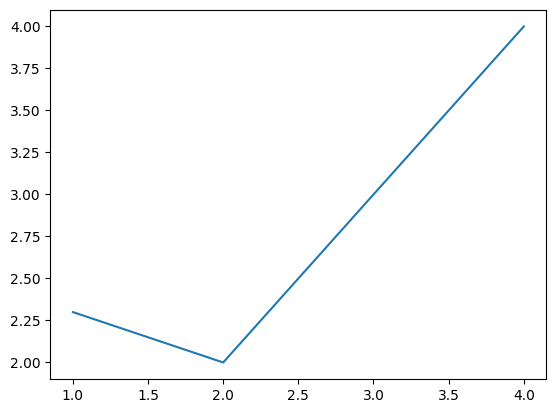

In [23]:
import matplotlib.pyplot as plt

worker_numbers = [1, 2, 3, 4]

seconds = [2.3, 2, 3, 4]

plt.plot(worker_numbers, seconds)
plt.show()